# K-Nearest Neighbors Classification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
from sklearn.datasets import load_iris
iris=load_iris()

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df['flower_name']=df.target.apply(lambda x : iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [9]:
df0=df[:50]
df1=df[50:100]
df2=df[100:150]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


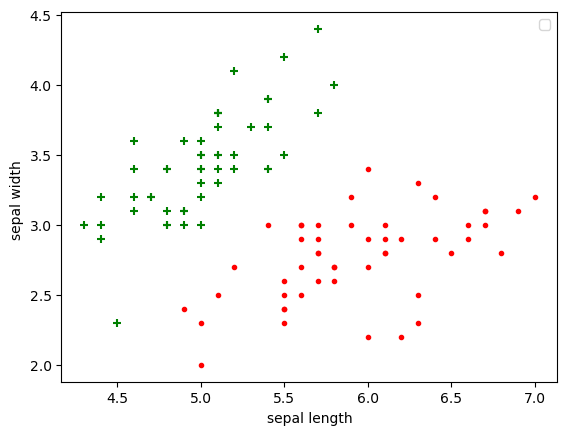

In [12]:
%matplotlib inline
plt.xlabel('sepal length')
plt.ylabel('sepal width ')
plt.legend()
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='red', marker='.')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


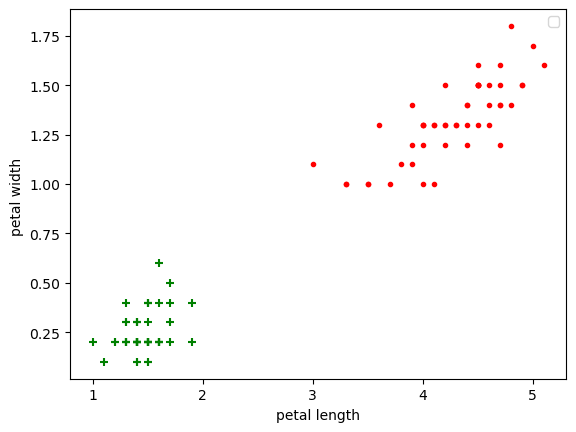

In [13]:
%matplotlib inline
plt.xlabel('petal length')
plt.ylabel('petal width ')
plt.legend()
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green', marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='red', marker='.')

In [14]:
X= df.drop(['target', 'flower_name'], axis='columns')
Y=df.target

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)

In [18]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10)

In [19]:
knn.score(X_test, Y_test)

0.9666666666666667

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
y_predicted=knn.predict(X_test)
cm=confusion_matrix(Y_test, y_predicted)
cm

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  1,  9]])

In [24]:
import seaborn as sn

Text(58.222222222222214, 0.5, 'Truth')

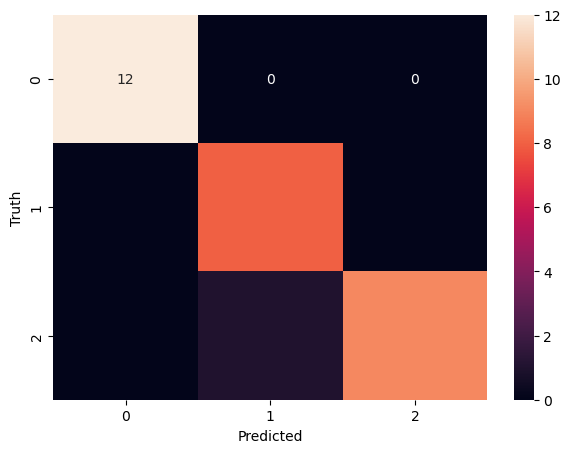

In [27]:
%matplotlib inline
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')